In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [2]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4080,ham,Hurry home. Soup is DONE!,NaN,NaN,NaN
4615,ham,ÌÏ called dad oredi...,NaN,NaN,NaN
4647,ham,We are okay. Going to sleep now. Later,NaN,NaN,NaN
3750,ham,"Haha... Sounds crazy, dunno can tahan anot...",NaN,NaN,NaN
4801,ham,Reverse is cheating. That is not mathematics.,NaN,NaN,NaN


In [4]:

df = df[["v1","v2"]]
df.rename(columns={"v1":"label","v2":"text"},inplace=True)

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.label.value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

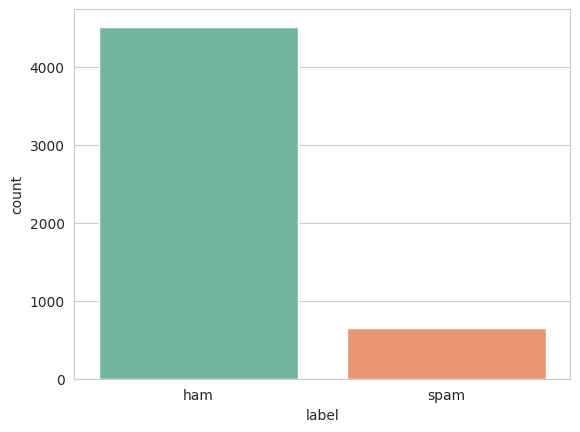

In [11]:
sns.barplot(x=df.label.value_counts().index,y=df.label.value_counts())

<Axes: xlabel='text', ylabel='Count'>

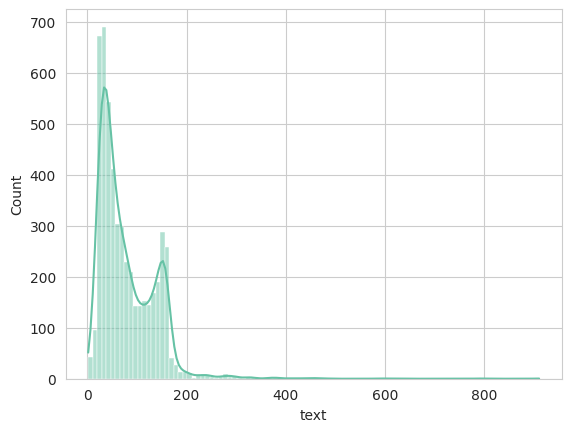

In [12]:
sns.histplot(df["text"].apply(len),bins=100,kde=True)

<Axes: title={'center': 'Average Number of Sentences'}, xlabel='type', ylabel='sentences'>

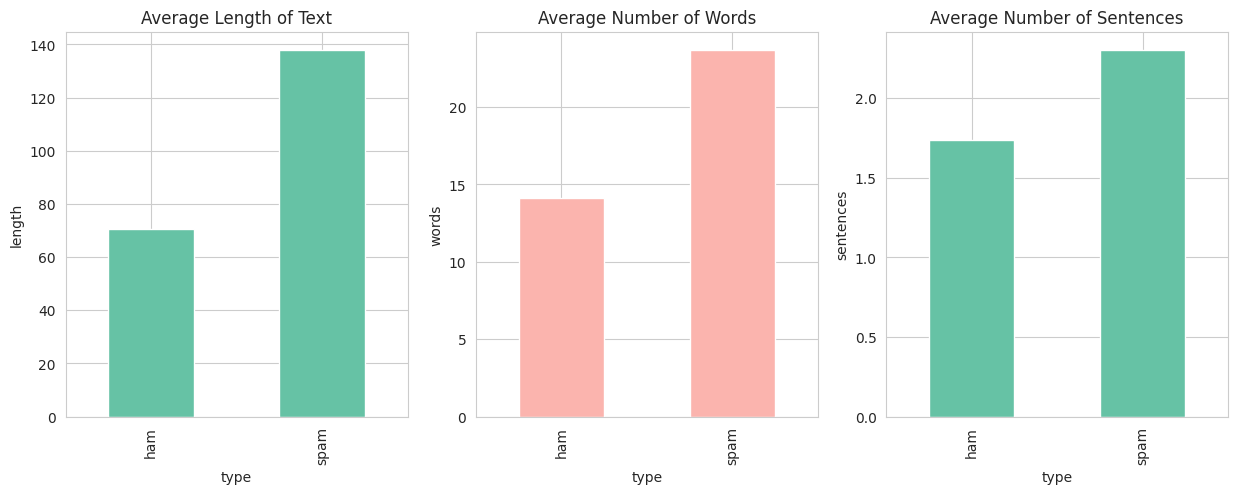

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

df.groupby("label").apply(lambda x: x["text"].apply(len).mean()).plot(
    kind="bar", ax=ax1, title="Average Length of Text",xlabel="type",ylabel="length")

df.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(
    x.split())).mean()).plot(kind="bar", ax=ax2, title="Average Number of Words",xlabel="type",ylabel="words",colormap="Pastel1")

df.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(x.split(
    ". "))).mean()).plot(kind="bar", ax=ax3, title="Average Number of Sentences",xlabel="type",ylabel="sentences")

In [14]:
df["text"].sample(5)

4039                               I'm at home n ready...
2439    Rightio. 11.48 it is then. Well arent we all u...
1156    Hey.. Something came up last min.. Think i wun...
4688          Didn't try, g and I decided not to head out
2823      No need to buy lunch for me.. I eat maggi mee..
Name: text, dtype: object

In [15]:
import re
import string
from nltk.corpus import stopwords
import nltk
stopwd = stopwords.words('english')
def clean_text(text):

    text= text.lower() # Lowercasing the text
    text = re.sub('-',' ',text.lower())   # Replacing `x-x` as `x x`
    text = re.sub(r'http\S+', '', text) # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuations
    text = re.sub(r'\s+', ' ', text) # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Removing single characters
    
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2]) # Removing the stop words

    return text.strip()

In [16]:
df["clean_text"] = df["text"].apply(clean_text)

In [17]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135,), (1034,), (4135,), (1034,))

In [20]:
X_train.head()

2228                                     exact intentions
5529                                                  one
2149                              waaaat lololo next time
5058    free video camera phones half price line renta...
5051    tick tick tick could die loneliness know pouts...
Name: clean_text, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(stop_words='english',lowercase=True)
# vectorizer = TfidfVectorizer(stop_words='english',max_features=10000,ngram_range=(1,3),lowercase=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [22]:
X_train_vectorized.shape, X_test_vectorized.shape

((4135, 7759), (1034, 7759))

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

<Axes: xlabel='0'>

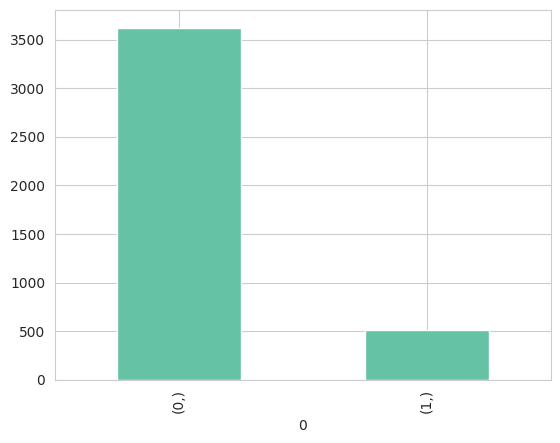

In [24]:
pd.DataFrame(y_train).value_counts().plot(kind="bar")

In [25]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output of Vectorizer from train data
x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_vectorized, y_train)

<Axes: xlabel='0'>

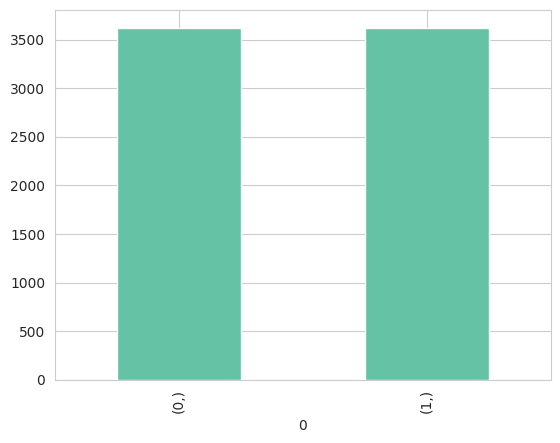

In [26]:
pd.DataFrame(y_train_resampled).value_counts().plot(kind="bar")

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,solver="sag",tol=0.001,max_iter=500,random_state=15)
lr.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=1000, max_iter=500, random_state=15, solver='sag',
                   tol=0.001)

In [29]:
print("Train Accuracy: ", lr.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", lr.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, lr.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, lr.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9796905222437138
Train Precision:  1.0
Test Precision:  0.9769230769230769


In [30]:
from sklearn.naive_bayes import MultinomialNB

cnb = MultinomialNB(alpha=0.1)
cnb.fit(x_train_resampled,y_train_resampled)

MultinomialNB(alpha=0.1)

In [31]:
print("Train Accuracy: ", cnb.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", cnb.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, cnb.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, cnb.predict(X_test_vectorized)))

Train Accuracy:  0.9896608767576509
Test Accuracy:  0.9642166344294004
Train Precision:  0.9860426929392446
Test Precision:  0.8461538461538461


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [33]:
print("Train Accuracy: ", rf.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", rf.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, rf.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, rf.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9709864603481625
Train Precision:  1.0
Test Precision:  1.0


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [35]:
print("Train Accuracy: ", dt.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", dt.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, dt.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, dt.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9584139264990329
Train Precision:  1.0
Test Precision:  0.8445945945945946
